<a href="https://colab.research.google.com/github/suyash091/BTC-Forecast/blob/master/BTC_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/BTC-USD-3.csv")
df_date = pd.to_datetime(df['Date'])

In [9]:
df = df.set_index(df_date)
#df.reset_index().sort_values('Date', ascending=True, inplace=True)

df['Adj Close'].head()

Date
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
Name: Adj Close, dtype: float64

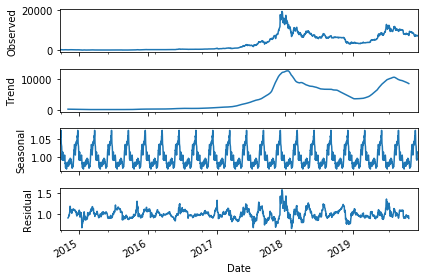

In [10]:
from  plotly.offline import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Adj Close'], freq=90, model='multiplicative')
fig = result.plot()
#plot_mpl(fig)

In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.4MB 4.7MB/s 


In [57]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df['Adj Close'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=3,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 3); AIC=26888.019, BIC=26915.777, Fit time=3.405 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 3); AIC=28177.944, BIC=28189.048, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 3); AIC=27703.191, BIC=27725.397, Fit time=1.463 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 3); AIC=26882.356, BIC=26904.563, Fit time=1.743 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 3); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 3); AIC=28175.949, BIC=28181.500, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 3); AIC=28167.231, BIC=28189.438, Fit time=1.570 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 3); AIC=26890.031, BIC=26923.342, Fit time=3.354 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 3); setting score to inf

In [0]:
train = df['Adj Close'].loc['2014-09-17':'2019-12-03']
test = df['Adj Close'].loc['2019-12-03':]

In [59]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 3),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [60]:
future_forecast = stepwise_model.predict(n_periods=5)
# This returns an array of predictions:
print(future_forecast)
print(test.values)


[7322.73388419 7316.14543504 7331.91088832 7335.11534675 7328.52850215]
[7320.145508 7252.034668 7448.307617 7546.996582 7396.904297]


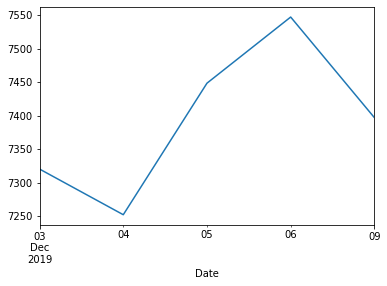

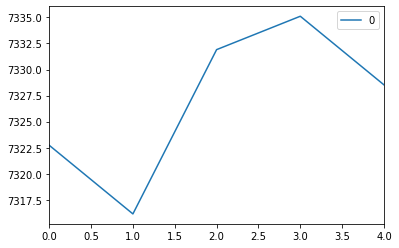

In [61]:
from matplotlib import pyplot
test.plot()
pd.DataFrame(future_forecast).plot()